In [1]:
%load_ext autoreload
#To update the imported files

In [2]:
%autoreload
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '../')
from constants import *
from utilities_xgb import *
from utilities import *

In [3]:
selected_features = ['date_forecast',
 'absolute_humidity_2m:gm3',
 'air_density_2m:kgm3',
 'clear_sky_energy_1h:J',
 'clear_sky_rad:W',
 'dew_or_rime:idx',
 'dew_point_2m:K',
 'diffuse_rad:W',
 'diffuse_rad_1h:J',
 'direct_rad_1h:J',
 'direct_rad:W',
 'effective_cloud_cover:p',
 'elevation:m',
 'fresh_snow_12h:cm',
 'fresh_snow_1h:cm',
 'fresh_snow_24h:cm',
 'fresh_snow_3h:cm',
 'fresh_snow_6h:cm',
 'is_day:idx',
 'is_in_shadow:idx',
 'msl_pressure:hPa',
 'precip_5min:mm',
 'precip_type_5min:idx',
 'pressure_100m:hPa',
 'pressure_50m:hPa',
 'prob_rime:p',
 'rain_water:kgm2',
 'relative_humidity_1000hPa:p',
 'sfc_pressure:hPa',
 'snow_depth:cm',
 'snow_drift:idx',
 'snow_melt_10min:mm',
 'snow_water:kgm2',
 'sun_azimuth:d',
 'sun_elevation:d',
 'super_cooled_liquid_water:kgm2',
 't_1000hPa:K',
 'total_cloud_cover:p',
 'visibility:m',
 'wind_speed_10m:ms',
 'wind_speed_u_10m:ms',
 'wind_speed_v_10m:ms',
 'wind_speed_w_1000hPa:ms']
hyperparameters = {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}
wanted_months = [3,4,5,6,7,8,9]

# Dataset A

In [4]:
selected_features_a = selected_features.copy()
#selected_features_a.remove("direct_rad:W")
hyperparameters_a = hyperparameters
wanted_months_a = wanted_months

In [5]:
X_train_a = prepare_X(X_observed_a, X_estimated_a, selected_features_a, wanted_months_a)
X_train_a, y_train_a = resize_training_data(X_train_a, y_a)
X_test_a = prepare_testdata_rf_a(X_test_a, selected_features_a)

In [6]:
xgb_a = XGB_model(hyperparameters, X_train_a, X_test_a, y_train_a)

In [7]:
#xgb_a_cross_val_predictions,xgb_a_cross_val_actuals, xgb_a_cross_val_mae_mean = xgb_a.cross_val_stack(X_train_a, y_train_a)

In [8]:
xgb_a.cross_validate(X_train_a, y_train_a)

Cross-validation scores: [303.73853952 295.8884642  301.66024711 288.41331545 175.03872868]
Mean cross-validation score: 272.9478589935708


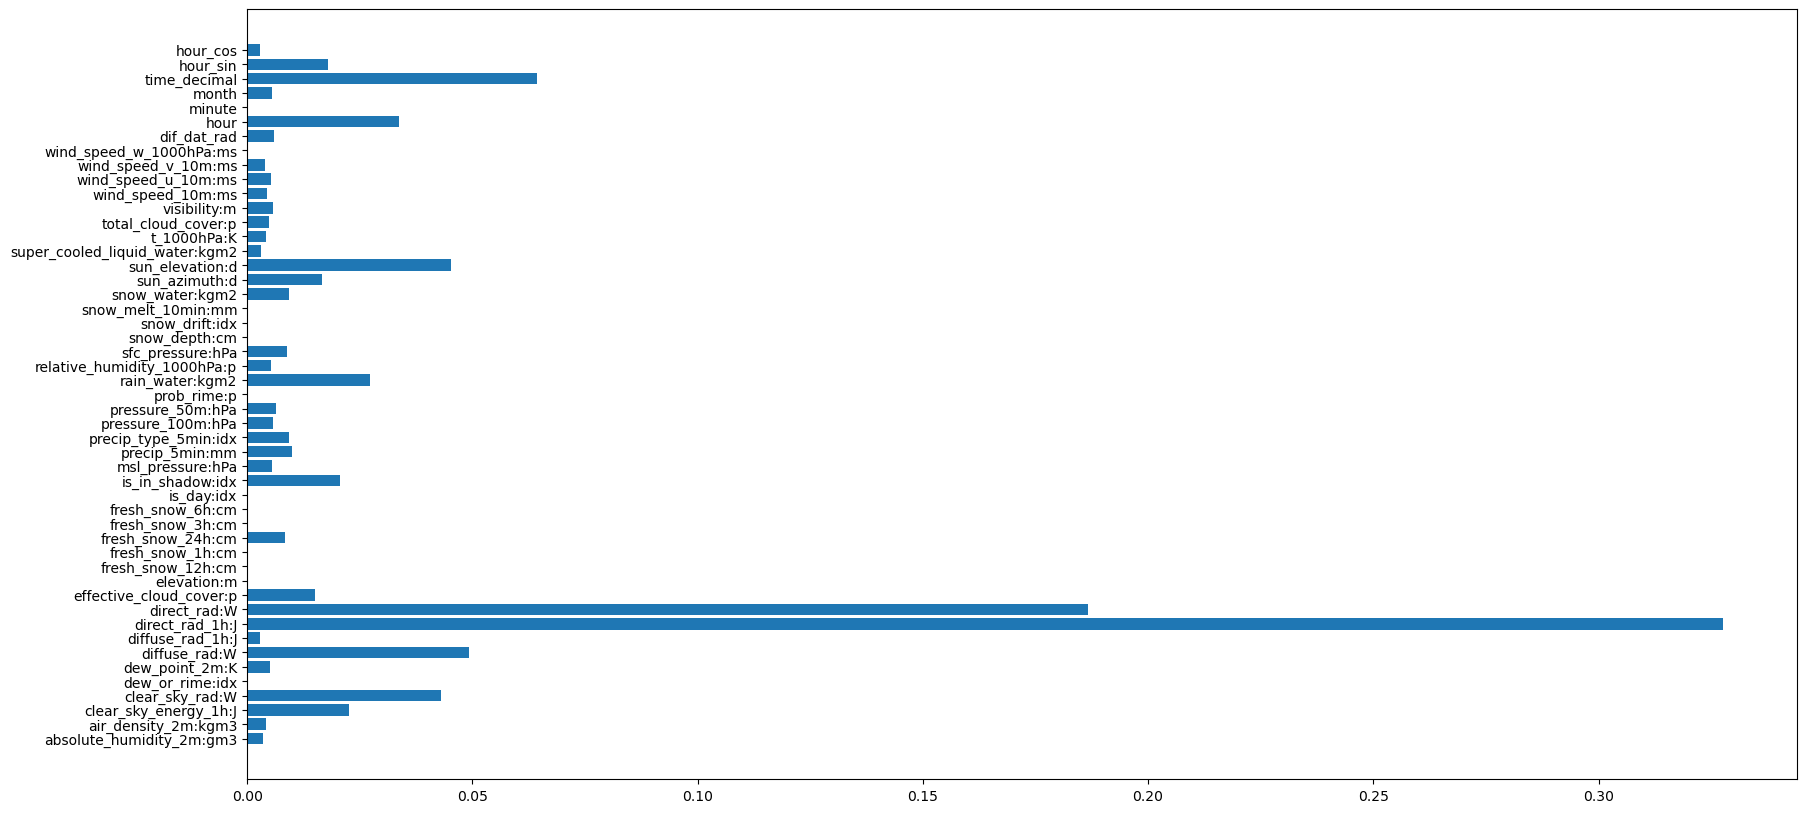

In [9]:
xgb_a.fit()
xgb_a.pred()
xgb_a_test_pred = xgb_a.prediction
xgb_a.feature_importence_plot()

# Dataset B

In [10]:
selected_features_b = selected_features
hyperparameters_b = hyperparameters
wanted_months_b = wanted_months

In [11]:
y_to_fit_b, y_to_predict_b = augment_y_b(y_b.copy())
y_augmented_b = predict_y_with_XGB(y_to_fit_b.copy(),y_to_predict_b.copy(),X_observed_b.copy(), X_estimated_b.copy(), selected_features_b.copy(), wanted_months_b.copy(), hyperparameters_b.copy())

penis


In [12]:
X_train_b_before_prepare = prepare_X(X_observed_b.copy(), X_estimated_b.copy(), selected_features_b.copy(), wanted_months_b.copy())
X_train_b, y_train_b = resize_training_data(X_train_b_before_prepare.copy(), y_augmented_b.copy())
X_test_b = prepare_testdata_rf_a(X_test_b.copy(), selected_features_b.copy())

In [13]:
xgb_b = XGB_model(hyperparameters_b, X_train_b, X_test_b, y_train_b)

In [14]:
#xgb_b_cross_val_predictions,xgb_b_cross_val_actuals, xgb_b_cross_val_mae_mean = xgb_b.cross_val_stack(X_train_b, y_train_b)

In [15]:
xgb_b.cross_validate(X_train_b, y_train_b)

Cross-validation scores: [58.94290159 50.56411056 59.75266723 49.40014595 30.1689389 ]
Mean cross-validation score: 49.76575284502831


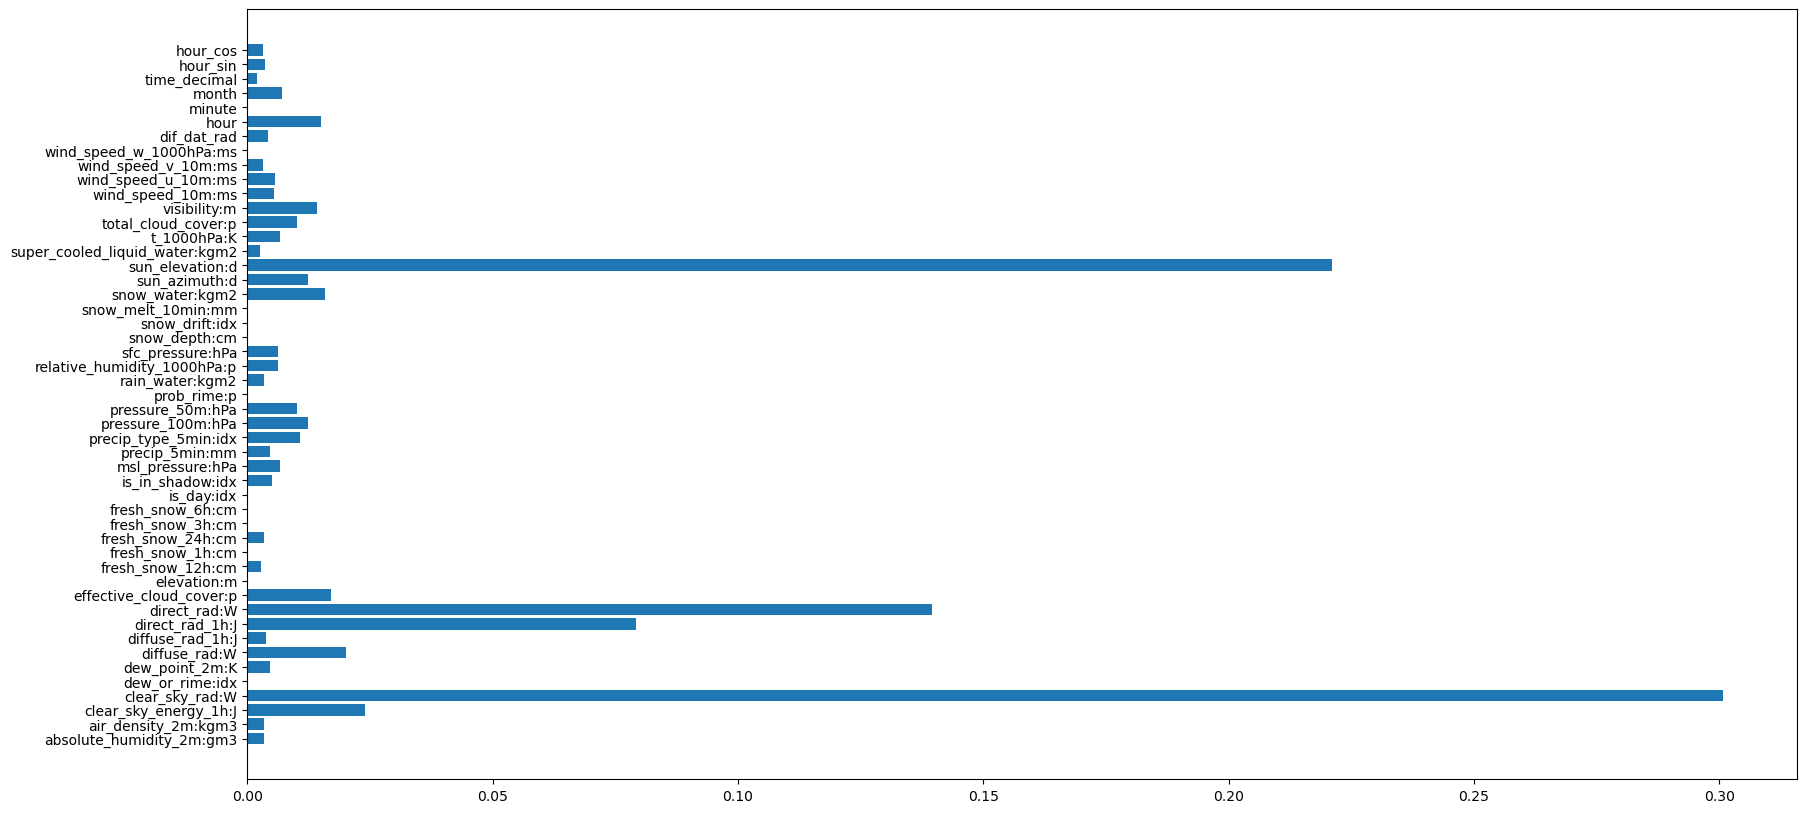

In [16]:
xgb_b.fit()
xgb_b.pred()
xgb_b_test_pred = xgb_b.prediction
xgb_b.feature_importence_plot()

# Dataset C

In [17]:
selected_features_c = selected_features
hyperparameters_c = hyperparameters
wanted_months_c = wanted_months

In [18]:
y_to_fit_c, y_to_predict_c = augment_y_c(y_c.copy())
y_augmented_c = predict_y_with_XGB(y_to_fit_c.copy(),y_to_predict_c.copy(),X_observed_c.copy(), X_estimated_c.copy(), selected_features_c.copy(), wanted_months_c.copy(), hyperparameters_c.copy())

penis


In [19]:
X_train_c = prepare_X(X_observed_c.copy(), X_estimated_c.copy(), selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c.copy(), y_augmented_c)
X_test_c = prepare_testdata_rf_a(X_test_c.copy(), selected_features_c)

In [20]:
xgb_c = XGB_model(hyperparameters, X_train_c, X_test_c, y_train_c)

In [21]:
xgb_c_cross_val_predictions,xgb_c_cross_val_actuals, xgb_c_cross_val_mae_mean = xgb_c.cross_val_stack(X_train_c, y_train_c)

In [22]:
xgb_c.cross_validate(X_train_c, y_train_c)

Cross-validation scores: [31.09297012 41.74400283 17.19937696 20.06946211 16.8590773 ]
Mean cross-validation score: 25.39297786518599


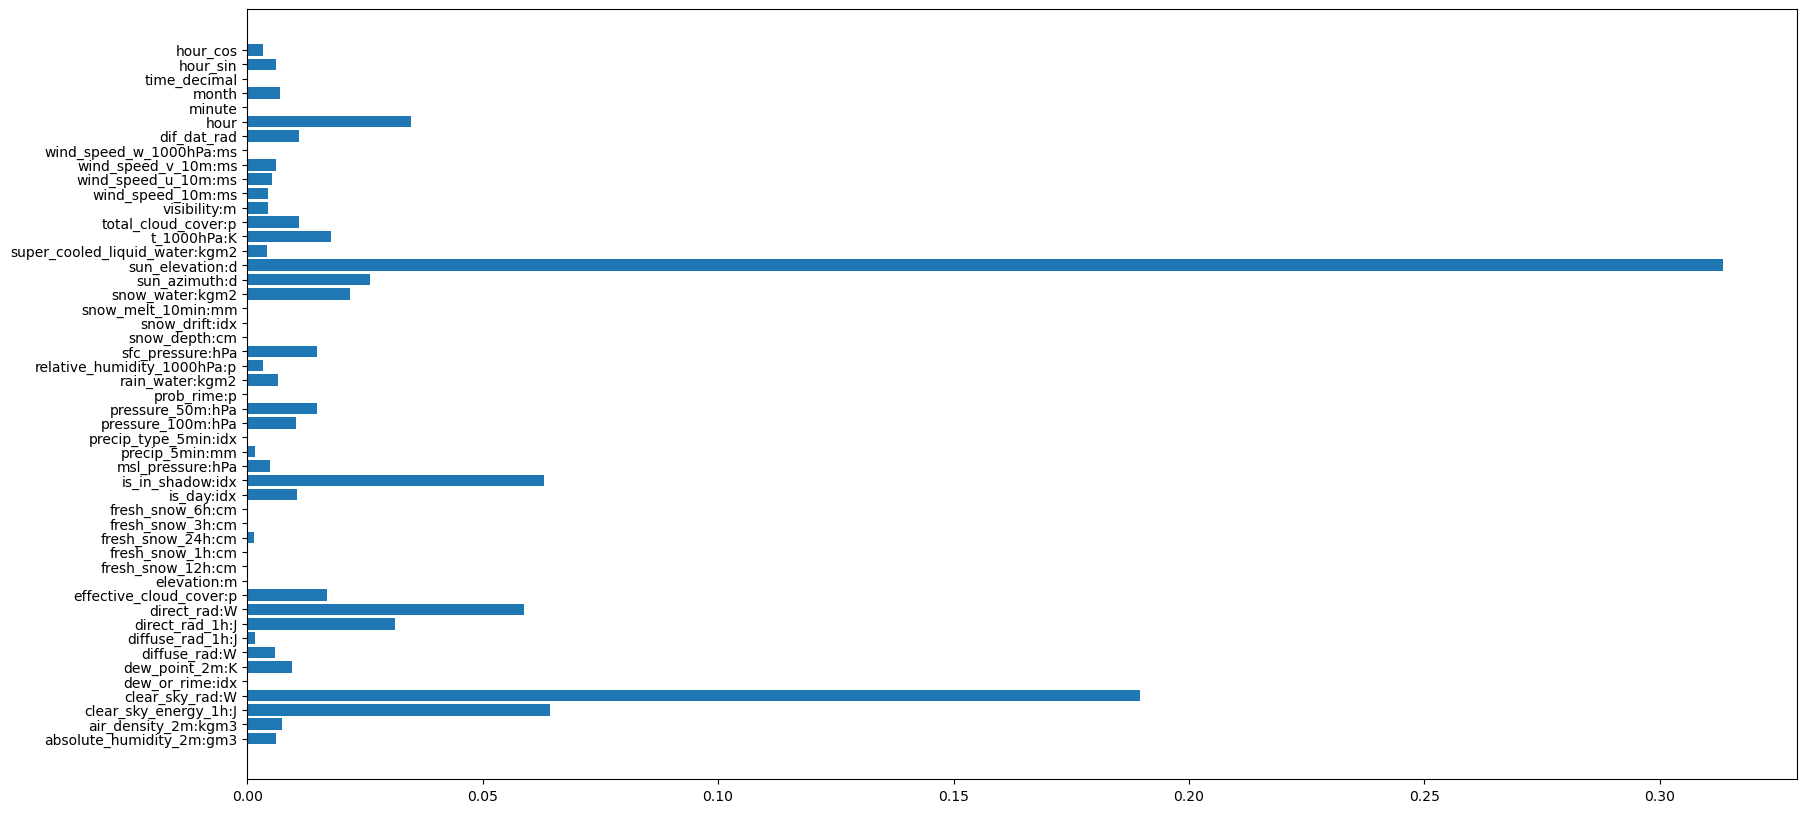

In [23]:
xgb_c.fit()
xgb_c.pred()
xgb_c_test_pred = xgb_c.prediction
xgb_c.feature_importence_plot()